In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Download the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Get the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
# Create a simple CNN model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [4]:
# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 5ms/step - loss: 1.4949 - accuracy: 0.4690
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1610 - accuracy: 0.5945
Epoch 3/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0311 - accuracy: 0.6430
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9575 - accuracy: 0.6681
Epoch 5/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.9038 - accuracy: 0.6867
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8638 - accuracy: 0.7015
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8271 - accuracy: 0.7134
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7964 - accuracy: 0.7254
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7696 - accuracy: 0.7358
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.74

313/313 [==============================] - 1s 3ms/step - loss: 0.8968 - accuracy: 0.6985


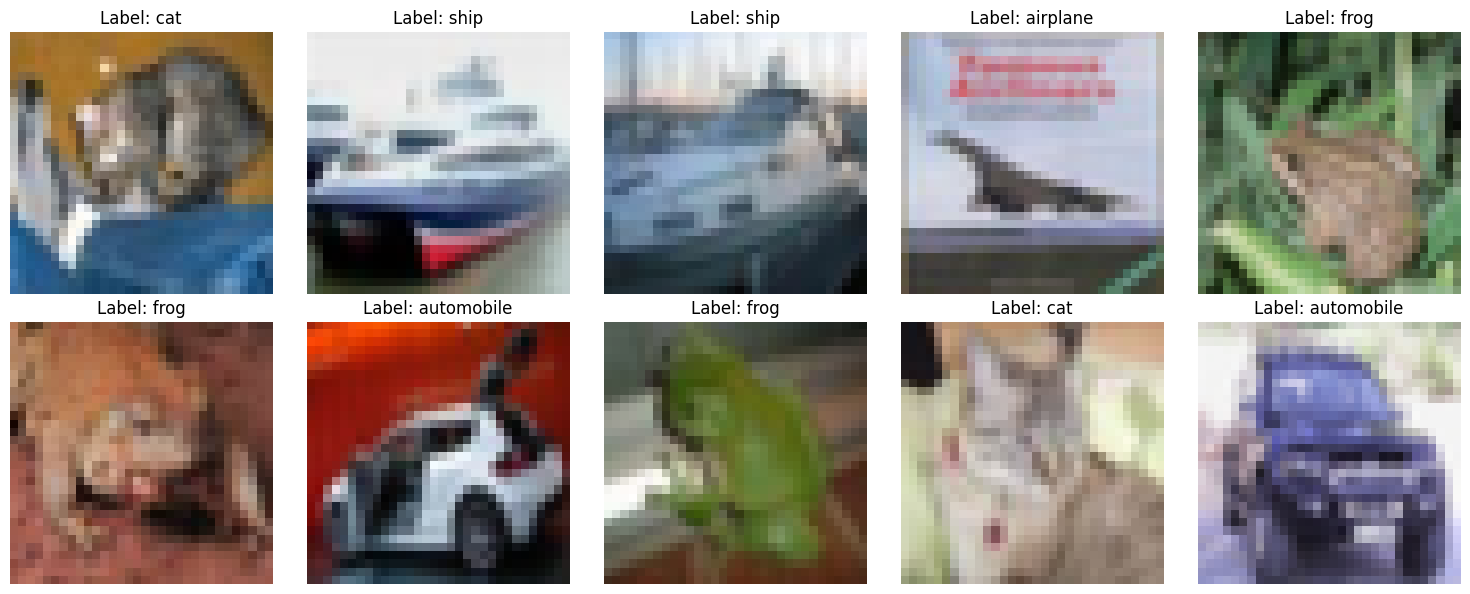

In [10]:
# Evaluate the model
model.evaluate(test_images, test_labels)

# Set up the figure with a specified size
plt.figure(figsize=(15, 6))

for i, image in enumerate(test_images[:10]):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns, current index
    plt.imshow(image)

    label = test_labels[i]

    # Check if label is an array or list and has only one element
    if isinstance(label, (list, np.ndarray)) and len(label) == 1:
        label = label[0]

    label_name = class_names[label]
    plt.title(f'Label: {label_name}')
    plt.axis('off')  # Turn off axis numbers and ticks

plt.tight_layout()  # Adjusts spacing between subplots
plt.show()
